In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [194]:
df_all = pd.read_csv('../../data/fanfic_regression_data_20211216_topic_only_no_crossover_author_controls.tsv', sep = '\t')

In [195]:
len(df_all)

540975

In [196]:
df_all['Topic_novelty'].head()

0    0.245356
1    0.165296
2    0.598657
3    0.197402
4    0.594861
Name: Topic_novelty, dtype: float64

In [197]:
topic_ave = np.average(df_all['Topic_novelty'])
df_all['Topic_novelty_cent'] = df_all['Topic_novelty'] - topic_ave
df_all['Topic_novelty_squared'] = np.square(df_all['Topic_novelty_cent'])

In [198]:
len(df_all)

540975

In [199]:
df_all['kudos_hit_ratio'].head()

0   -6.990569
1   -3.372884
2   -2.253795
3   -3.347613
4   -3.213034
Name: kudos_hit_ratio, dtype: float64

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [201]:
subset = df_all[['Chapters', 'Words','Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
       'Rating_N', 'Rating_T',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
       'History']]

In [202]:
# for i in range(len(subset.columns.values)):
#     print(subset.columns.values[i], variance_inflation_factor(subset.values, i))

In [203]:
# df_all = df_all[df_all['Fandom_attack_on_titan'] == 1]

### Logistic

In [204]:
df_all.columns.values

array(['Chapters', 'Kudos', 'Words', 'Comments', 'Hits', 'Bookmarks',
       'URL', 'Dist', 'Topic_novelty', 'Freq_relationship', 'History',
       'author_fic_cnt', 'author_kudos_ave', 'author_history',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon', 'Rating_E',
       'Rating_G', 'Rating_M', 'Rating_N', 'Rating_T',
       'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who',
       'Fandom_star_wars', 'Fandom_arthurian', 'Fandom_supernatural',
       'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fand

In [205]:
def run_logit(df, field, sq_option):
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    if sq_option:
        logit_model = sm.Logit(df['binary'], df[['Topic_novelty', 'Topic_novelty_squared',\
            'Words', 'Chapters', 'author_fic_cnt', 'author_kudos_ave', 'author_history', \
            'Freq_relationship','Category_F_F', 'Category_F_M',\
           'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other', \
           'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
           'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
           'ArchiveWarnings_violence',\
            'Rating_G',\
           'Rating_M', 'Rating_N', 'Rating_T', \
           'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
           'Fandom_arthurian', 'Fandom_supernatural',
           'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
           'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
           'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
           'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
           'Fandom_ms_paint_adventures', 'Fandom_marvel',
           'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
            'Intercept']]).fit(method='bfgs')
    else:
        logit_model = sm.Logit(df['binary'], df[['Topic_novelty',\
       'Words',  'Chapters', 'author_fic_cnt', 'author_kudos_ave', 'author_history', \
        'Freq_relationship', 'Category_F_F', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
        'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T', \
       'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [206]:
def run_ols(df, field, sq_option):
    df = run_logit(df, field, sq_option=sq_option)
    df = df[df[field] != 0]
    if field != 'kudos_hit_ratio':
        df[field] = np.log(df[field])
    print(len(df))
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    print(len(df))
    if sq_option:
        model = ols( field + " ~ Topic_novelty +  Topic_novelty_squared\
         + Words + Chapters + author_fic_cnt + author_kudos_ave + \
        author_history +  Freq_relationship\
     + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
     + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
     ArchiveWarnings_choose_no +\
     ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
     + Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
     Fandom_supernatural  + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
     + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
     + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
     Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
     Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock + nonzero_prob", data = df).fit()
    else:
        model = ols( field + " ~ \
         Topic_novelty  + Words \
     + Chapters + author_fic_cnt + author_kudos_ave + author_history + Freq_relationship\
     + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
     + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
     ArchiveWarnings_choose_no +\
     ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
     + Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
     Fandom_supernatural  + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
     + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
     + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
     Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
     Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock + nonzero_prob", data = df).fit()
    return model

### Plot coefficients

In [207]:
def run_all():
    global kudos_model_sq_True, kudos_coef_sq_True, kudos_err_sq_True
    global hits_model_sq_True, hits_coef_sq_True, hits_err_sq_True
    global comments_model_sq_True,comments_coef_sq_True, comments_err_sq_True
    global bookmarks_model_sq_True, bookmarks_coef_sq_True, bookmarks_err_sq_True
    global kudos_hits_ratio_model_sq_True, kudos_hits_ratio_coef_sq_True, kudos_hits_ratio_err_sq_True
    global ylabels_sq_True

    global kudos_model_sq_False, kudos_coef_sq_False, kudos_err_sq_False
    global hits_model_sq_False, hits_coef_sq_False, hits_err_sq_False
    global comments_model_sq_False,comments_coef_sq_False, comments_err_sq_False
    global bookmarks_model_sq_False, bookmarks_coef_sq_False, bookmarks_err_sq_False
    global kudos_hits_ratio_model_sq_False, kudos_hits_ratio_coef_sq_False, kudos_hits_ratio_err_sq_False

    global ylabels_sq_False
    
    kudos_model_sq_True = run_ols(df_all, 'Kudos', sq_option=True)
    kudos_coef_sq_True = np.asarray(list(kudos_model_sq_True.params)[1:-1])
    kudos_err_sq_True = list(kudos_model_sq_True.bse)[1:-1]
    
    hits_model_sq_True = run_ols(df_all, 'Hits', sq_option=True)
    hits_coef_sq_True = list(hits_model_sq_True.params)[1:-1]
    hits_err_sq_True = list(hits_model_sq_True.bse)[1:-1]
    
    comments_model_sq_True = run_ols(df_all, 'Comments', sq_option=True)
    comments_coef_sq_True = list(comments_model_sq_True.params)[1:-1]
    comments_err_sq_True = list(comments_model_sq_True.bse)[1:-1]
    
    bookmarks_model_sq_True = run_ols(df_all, 'Bookmarks', sq_option=True)
    bookmarks_coef_sq_True = list(bookmarks_model_sq_True.params)[1:-1]
    bookmarks_err_sq_True = list(bookmarks_model_sq_True.bse)[1:-1]
    
    kudos_hits_ratio_model_sq_True = run_ols(df_all, 'kudos_hit_ratio', sq_option=True)
    kudos_hits_ratio_coef_sq_True = list(kudos_hits_ratio_model_sq_True.params)[1:-1]
    kudos_hits_ratio_err_sq_True = list(kudos_hits_ratio_model_sq_True.bse)[1:-1]

    kudos_model_sq_False = run_ols(df_all, 'Kudos', sq_option=False)
    kudos_coef_sq_False = np.asarray(list(kudos_model_sq_False.params)[1:-1])
    kudos_err_sq_False = list(kudos_model_sq_False.bse)[1:-1]
    
    hits_model_sq_False = run_ols(df_all, 'Hits', sq_option=False)
    hits_coef_sq_False = list(hits_model_sq_False.params)[1:-1]
    hits_err_sq_False = list(hits_model_sq_False.bse)[1:-1]
    
    comments_model_sq_False = run_ols(df_all, 'Comments', sq_option=False)
    comments_coef_sq_False = list(comments_model_sq_False.params)[1:-1]
    comments_err_sq_False = list(comments_model_sq_False.bse)[1:-1]
    
    bookmarks_model_sq_False = run_ols(df_all, 'Bookmarks', sq_option=False)
    bookmarks_coef_sq_False = list(bookmarks_model_sq_False.params)[1:-1]
    bookmarks_err_sq_False = list(bookmarks_model_sq_False.bse)[1:-1]
    
    kudos_hits_ratio_model_sq_False = run_ols(df_all, 'kudos_hit_ratio', sq_option=False)
    kudos_hits_ratio_coef_sq_False = list(kudos_hits_ratio_model_sq_False.params)[1:-1]
    kudos_hits_ratio_err_sq_False = list(kudos_hits_ratio_model_sq_False.bse)[1:-1]

In [208]:
run_all()

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.048713
         Iterations: 35
         Function evaluations: 61
         Gradient evaluations: 48


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


532599
532599


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.107776
         Iterations: 35
         Function evaluations: 74
         Gradient evaluations: 61


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


528920
528920


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.471060
         Iterations: 35
         Function evaluations: 57
         Gradient evaluations: 46


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


392613
392613


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.363993
         Iterations: 35
         Function evaluations: 66
         Gradient evaluations: 48


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


435783
435783


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.152952
         Iterations: 35
         Function evaluations: 61
         Gradient evaluations: 47


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


520713
520713


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.048713
         Iterations: 35
         Function evaluations: 61
         Gradient evaluations: 48


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


532599
532599


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.107777
         Iterations: 35
         Function evaluations: 74
         Gradient evaluations: 61


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


528920
528920


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.471059
         Iterations: 35
         Function evaluations: 57
         Gradient evaluations: 46


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


392613
392613


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.363993
         Iterations: 35
         Function evaluations: 66
         Gradient evaluations: 48


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


435783
435783


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.152952
         Iterations: 35
         Function evaluations: 61
         Gradient evaluations: 47


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


520713
520713


In [209]:
kudos_model_sq_True.aic

1418736.6531012785

In [210]:
kudos_coef_sq_False

array([-1.20209507e+00,  4.85696252e-06,  8.67536594e-03,  7.61634387e-04,
        3.19094287e-03, -6.87510427e-05,  2.37768193e-01, -1.13633150e-01,
       -6.57469309e-02, -1.22796317e-01,  2.02358927e-01, -5.26177075e-02,
       -1.25405591e-01,  1.10071926e-01, -3.75734823e-01, -2.24957583e-01,
       -7.91912140e-02,  3.07322584e-02, -1.90179571e-02,  4.67394053e-01,
        1.24595779e-01,  6.84883619e-02, -5.54450538e-01, -2.35048335e-02,
       -6.14808749e-01, -1.06042480e-01, -4.52797051e-01, -5.59034902e-01,
       -1.55288001e-01, -3.60337733e-01, -5.43303765e-01, -3.30566841e-01,
       -1.08079106e+00, -7.45389976e-16, -5.14155711e-01, -2.40273834e-01,
       -6.81272734e-01, -7.71947328e-01, -4.41192213e-01, -4.11019774e-01,
        8.32156228e-02, -7.48677583e-01, -5.49170791e-01, -4.34453293e-01])

In [211]:
kudos_coef_sq_True

array([-1.21188739e+00,  5.22117320e-01,  4.77513289e-06,  8.50624577e-03,
        7.63190527e-04,  3.19025402e-03, -6.94869560e-05,  2.37672335e-01,
       -1.14809166e-01, -6.57383992e-02, -1.22493965e-01,  2.01122197e-01,
       -5.33892170e-02, -1.26174301e-01,  1.10298329e-01, -3.75875382e-01,
       -2.26986390e-01, -7.95090558e-02,  3.05745113e-02, -1.92468640e-02,
        4.67602729e-01,  1.23797978e-01,  6.84332957e-02, -5.54319513e-01,
       -2.42556277e-02, -6.19784696e-01, -1.06200695e-01, -4.58185328e-01,
       -5.59739884e-01, -1.57380914e-01, -3.61520953e-01, -5.46370667e-01,
       -3.33765700e-01, -1.08657452e+00, -9.85112569e-14, -5.15482190e-01,
       -2.40597967e-01, -6.84552784e-01, -7.73882076e-01, -4.40418075e-01,
       -4.12644879e-01,  8.53237457e-02, -7.54501485e-01, -5.51556240e-01,
       -4.36680156e-01])

In [212]:
def plot_ax(ax, title, coef, err, xlim_left, xlim_right, sq_option, ylabels, rsquared=0, xlabel='', \
            ylabel_flag=False, partial=False):
     
    ax.errorbar(coef[::-1], range(len(coef)), xerr=err[::-1] , fmt='o')
    ax.set_yticks(range(len(ylabels)))
    ax.set_xticks(range(int(xlim_left), int(xlim_right)+2, 2))
#     print(ylabels)

    if ylabel_flag:
        ax.set_yticklabels(ylabels)
    else:
        ax.set_yticklabels([])
    ax.plot([0 for i in range(len(ylabels)+2)], range(-1,len(ylabels)+1), c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [21.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [25.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [30.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [36.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
#     if sq_option:
#         ax.plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
#     else:
#         ax.plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    if partial:
        ax.set_ylim(36.5,len(ylabels))
    else:
        ax.set_ylim(-0.5,len(ylabels))
    ax.set_xlim(xlim_left,xlim_right)
    if xlabel != '':
        ax.set_xlabel(xlabel, fontsize=15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    if partial:
        ax.text(0.27, 0.9, '$R^2={}$'.format(rsquared), fontsize=15, transform=ax.transAxes)
    else:
        ax.text(0.2, 0.98, '$R^2={}$'.format(rsquared), fontsize=15, transform=ax.transAxes)
    ax.set_title(title, fontsize=15)

In [213]:
def plot_fig(partial=False):
    if partial:
        fig, axes = plt.subplots(2,5,figsize = (13,7))
    else:
        fig, axes = plt.subplots(2,5,figsize = (13,34))
        
    ylabel_sq_True =['Topic novelty', 'Topic novelty squared',\
                     'Words', 'Chapters', ' Author work count', 'Average author Kudos',\
                     'Author History', 'Frequent relationship',\
         'Category (General)','Category (Female/Female)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)',\
         'ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
         ArchiveWarnings (Non-consensual)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)',\
         'Fandom (Harry Potter)', ' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
          'Fandom (Supernatural)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
         ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
         ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
         Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
        Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]
    ylabel_sq_False =['Topic novelty', 'Words', 'Chapters', \
         ' Author work count','Average author Kudos',\
            'Author History','Frequent relationship',\
         'Category (General)','Category (Female/Female)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)',\
         'ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
         ArchiveWarnings (Non-consensual)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)',\
         'Fandom (Harry Potter)', ' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
          'Fandom (Supernatural)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
         ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
         ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
         Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
        Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]
    
    plot_ax(ax=axes[0][0],title='', ylabels=ylabel_sq_False, sq_option=False, coef=hits_coef_sq_False, err=hits_err_sq_False, xlim_left=min(hits_coef_sq_False)-1, xlim_right=max(hits_coef_sq_False)+1, rsquared=hits_model_sq_False.rsquared.round(3), partial=partial, ylabel_flag=True, xlabel='')
    plot_ax(ax=axes[0][1], title='', ylabels=ylabel_sq_False, sq_option=False, coef=kudos_coef_sq_False, err=kudos_err_sq_False, xlim_left=min(kudos_coef_sq_False)-1, xlim_right=max(kudos_coef_sq_False)+1, rsquared=kudos_model_sq_False.rsquared.round(3), partial=partial,  xlabel='')
    plot_ax(ax=axes[0][2], title='', ylabels=ylabel_sq_False, sq_option=False, coef=comments_coef_sq_False, err=comments_err_sq_False, partial=partial, xlim_left=min(comments_coef_sq_False)-1, xlim_right=max(comments_coef_sq_False)+1, rsquared=comments_model_sq_False.rsquared.round(3), xlabel='')
    plot_ax(ax=axes[0][3], title='',ylabels=ylabel_sq_False, sq_option=False, coef=bookmarks_coef_sq_False, err=bookmarks_err_sq_False, partial=partial,xlim_left=min(bookmarks_coef_sq_False)-1, xlim_right=max(bookmarks_coef_sq_False)+1, rsquared=bookmarks_model_sq_False.rsquared.round(3), xlabel='')
    plot_ax(ax=axes[0][4], title='',ylabels=ylabel_sq_False, sq_option=False, coef=kudos_hits_ratio_coef_sq_False, err=kudos_hits_ratio_err_sq_False, partial=partial,xlim_left=min(kudos_hits_ratio_coef_sq_False)-1, xlim_right=max(kudos_hits_ratio_coef_sq_False)+1, rsquared=kudos_hits_ratio_model_sq_False.rsquared.round(3), xlabel='')

    plot_ax(ax=axes[1][0], title='',ylabels=ylabel_sq_True, sq_option=True, coef=hits_coef_sq_True, err=hits_err_sq_True, xlabel='Hits', xlim_left=min(hits_coef_sq_True)-1, xlim_right=max(hits_coef_sq_True)+1, rsquared=hits_model_sq_True.rsquared.round(3),ylabel_flag=True, partial=partial)
    plot_ax(ax=axes[1][1], title='',ylabels=ylabel_sq_True, sq_option=True, coef=kudos_coef_sq_True, err=kudos_err_sq_True, xlim_left=min(kudos_coef_sq_True)-1, xlim_right=max(kudos_coef_sq_True)+1, rsquared=kudos_model_sq_True.rsquared.round(3), xlabel='Kudos', partial=partial)
    plot_ax(ax=axes[1][2], title='', ylabels=ylabel_sq_True, sq_option=True, coef=comments_coef_sq_True, err=comments_err_sq_True, partial=partial, xlim_left=min(comments_coef_sq_True)-1, xlim_right=max(comments_coef_sq_True)+1, rsquared=comments_model_sq_True.rsquared.round(3), xlabel='Comments')
    plot_ax(ax=axes[1][3], title='',ylabels=ylabel_sq_True, sq_option=True, coef=bookmarks_coef_sq_True, err=bookmarks_err_sq_True, partial=partial,xlim_left=min(bookmarks_coef_sq_True)-1, xlim_right=max(bookmarks_coef_sq_True)+1, rsquared=bookmarks_model_sq_True.rsquared.round(3), xlabel='Bookmarks')
    plot_ax(ax=axes[1][4], title='',ylabels=ylabel_sq_True, sq_option=True, coef=kudos_hits_ratio_coef_sq_True, err=kudos_hits_ratio_err_sq_True, partial=partial,xlim_left=min(kudos_hits_ratio_coef_sq_True)-1, xlim_right=max(kudos_hits_ratio_coef_sq_True)+1, rsquared=kudos_hits_ratio_model_sq_True.rsquared.round(3), xlabel='Kudos to Hits Ratio')

#     plt.figtext(0.5, 0.99, 'Models 1-4', fontsize=25)
#     plt.figtext(0.5, 0.49, 'Models 5-8', fontsize=25)

    if partial:
        plt.figtext(0.13, 0.93, 'a', fontsize=25)
        plt.figtext(0.13, 0.5, 'b', fontsize=25)
    else:
        plt.figtext(0.13, 0.98, 'a', fontsize=25)
        plt.figtext(0.13, 0.49, 'b', fontsize=25)

    plt.tight_layout()
#     plt.savefig('ols_coefs_partial={}_topic_only_no_crossover_author_control.pdf'.format(partial), format='pdf')

<IPython.core.display.Javascript object>


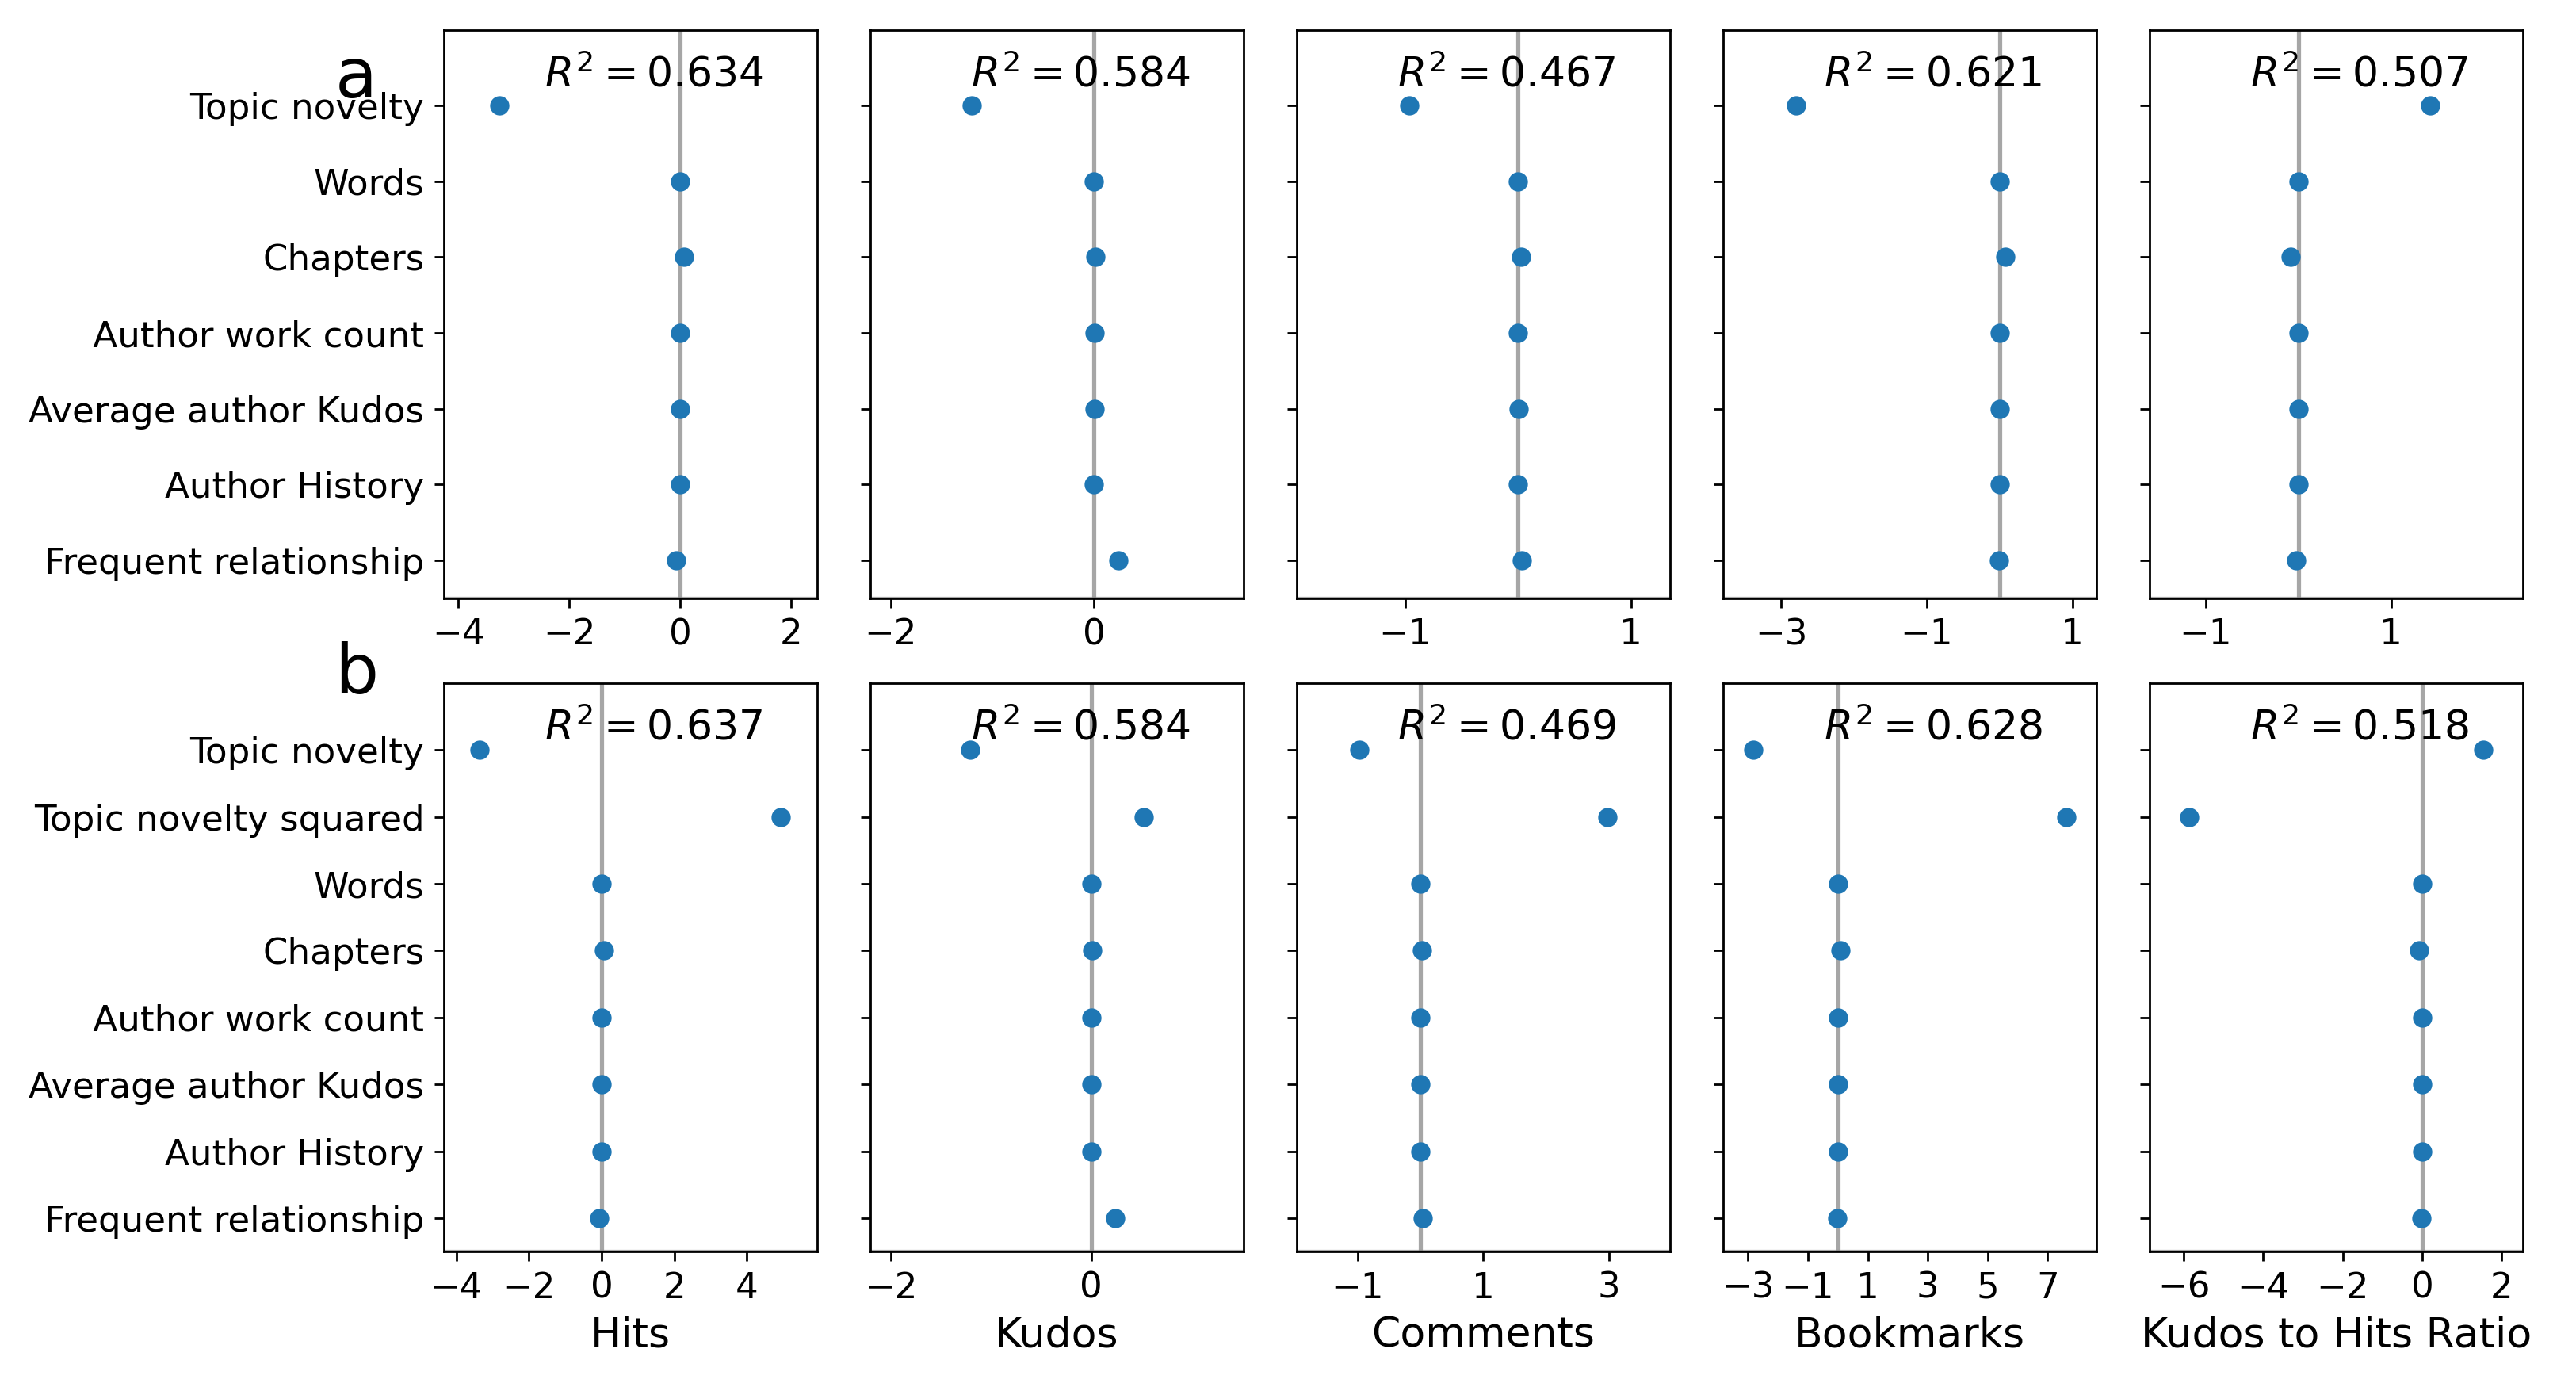

In [214]:
plot_fig(partial=True)

<IPython.core.display.Javascript object>


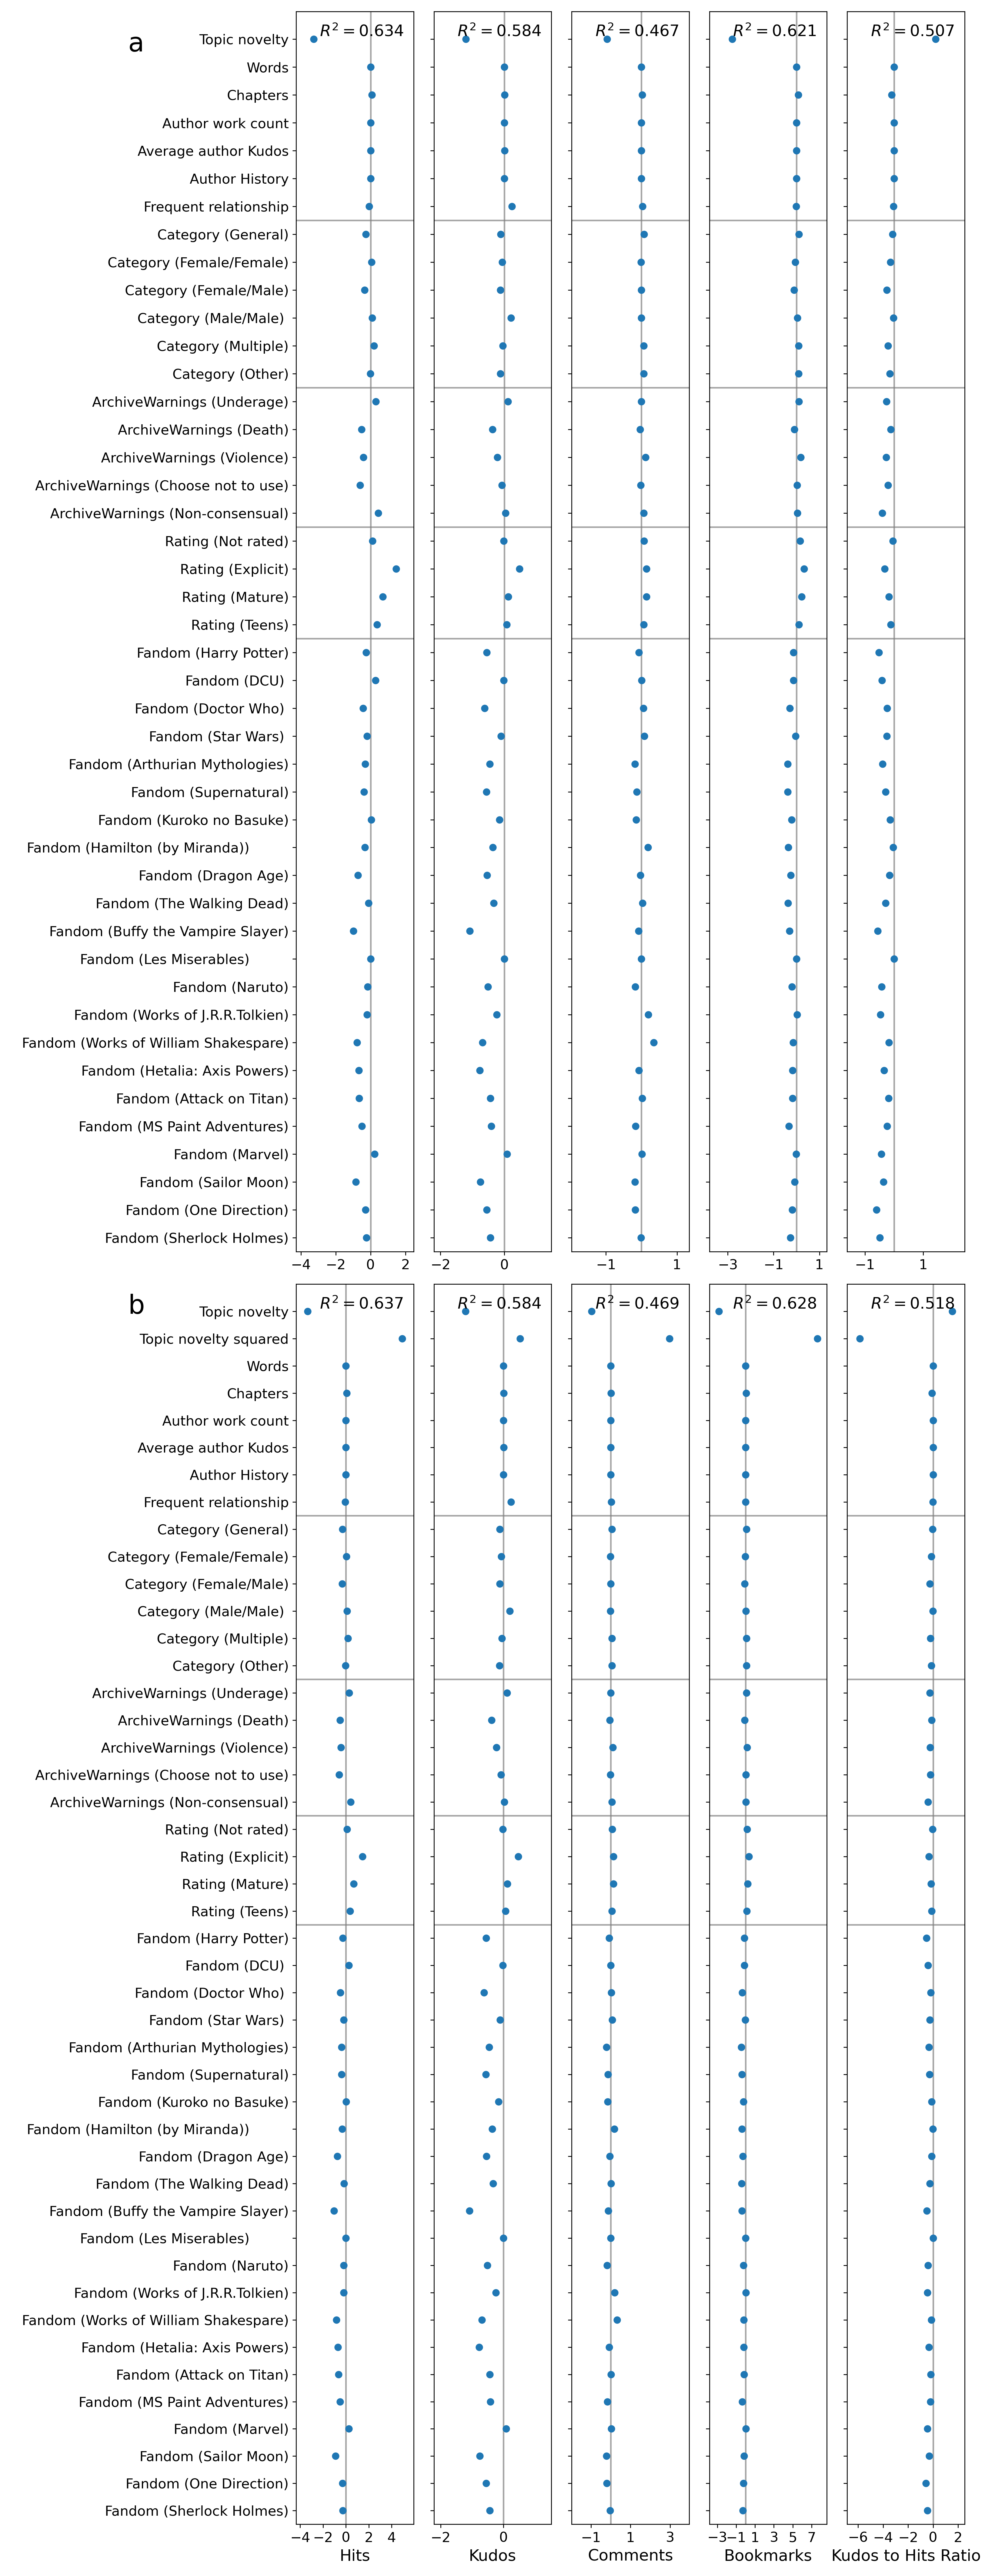

In [215]:
plot_fig(partial=False)

In [216]:
kudos_model_sq_True

<IPython.core.display.Javascript object>


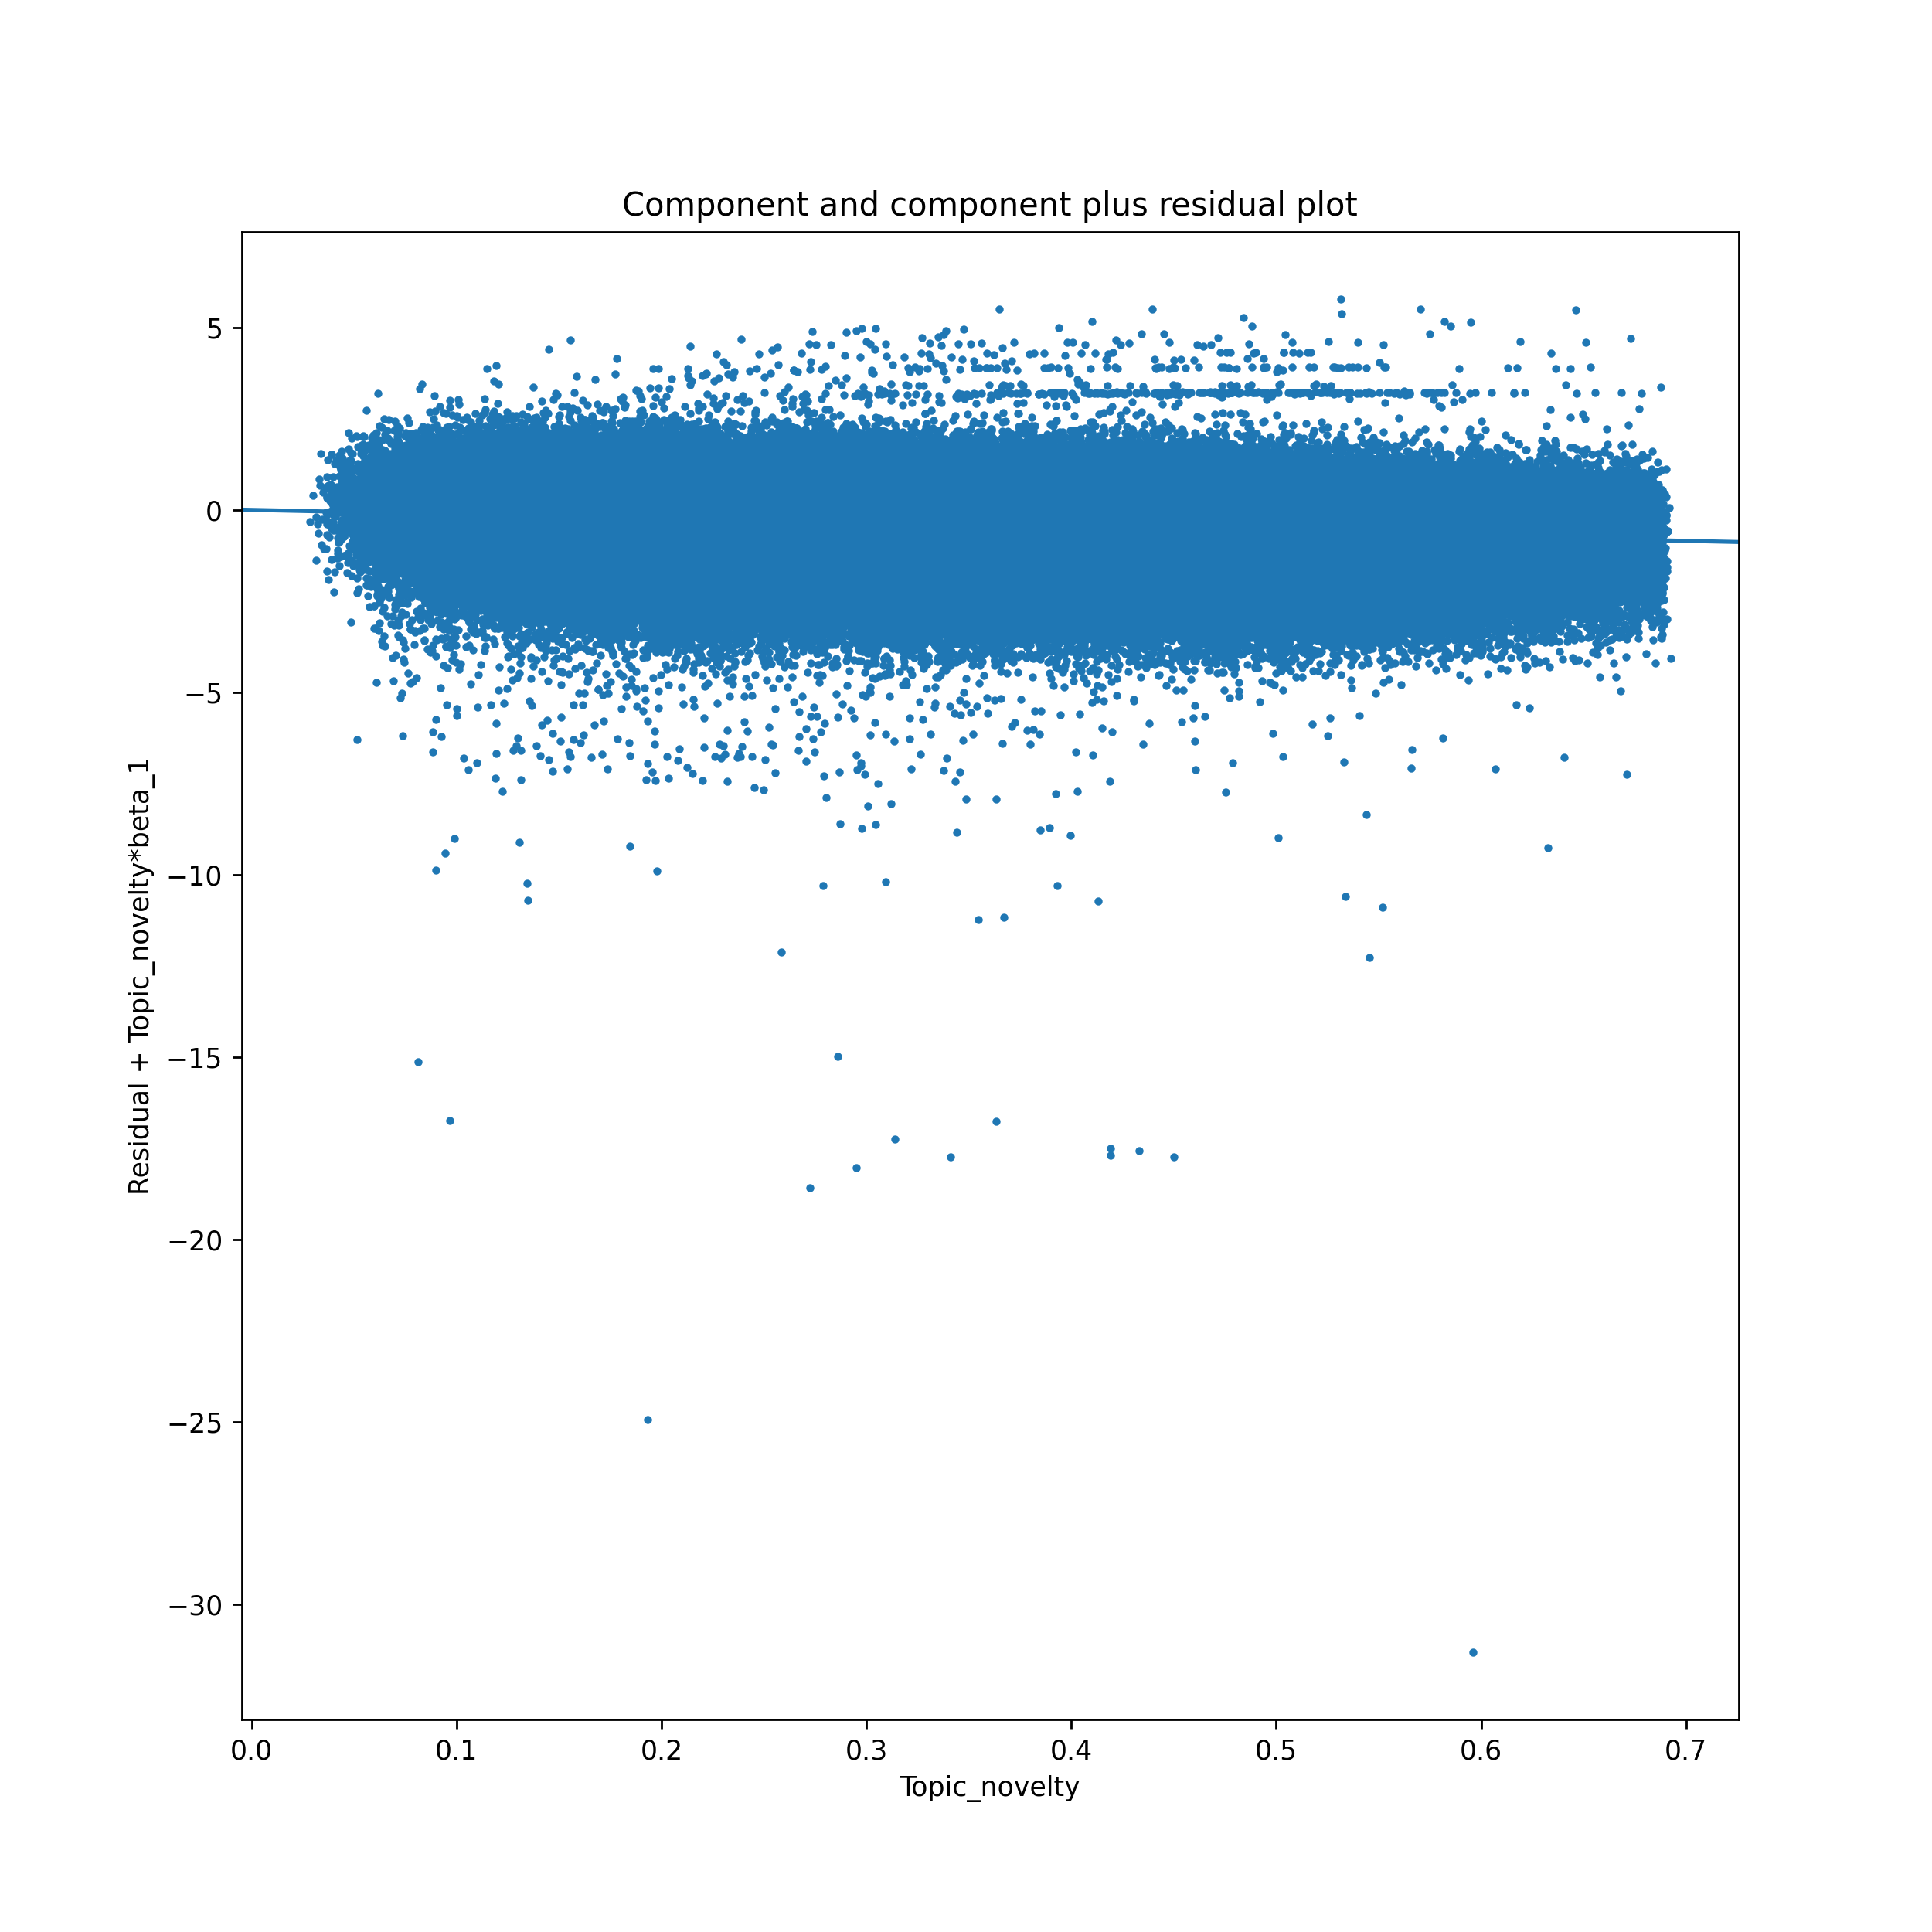

In [217]:
fig, ax = plt.subplots(figsize=(10,10))
sm.graphics.plot_ccpr(kudos_model_sq_True, 'Topic_novelty', ax=ax)
# ax.set_aspect(1)
ax.get_lines()[0].set_markersize(2)

<IPython.core.display.Javascript object>


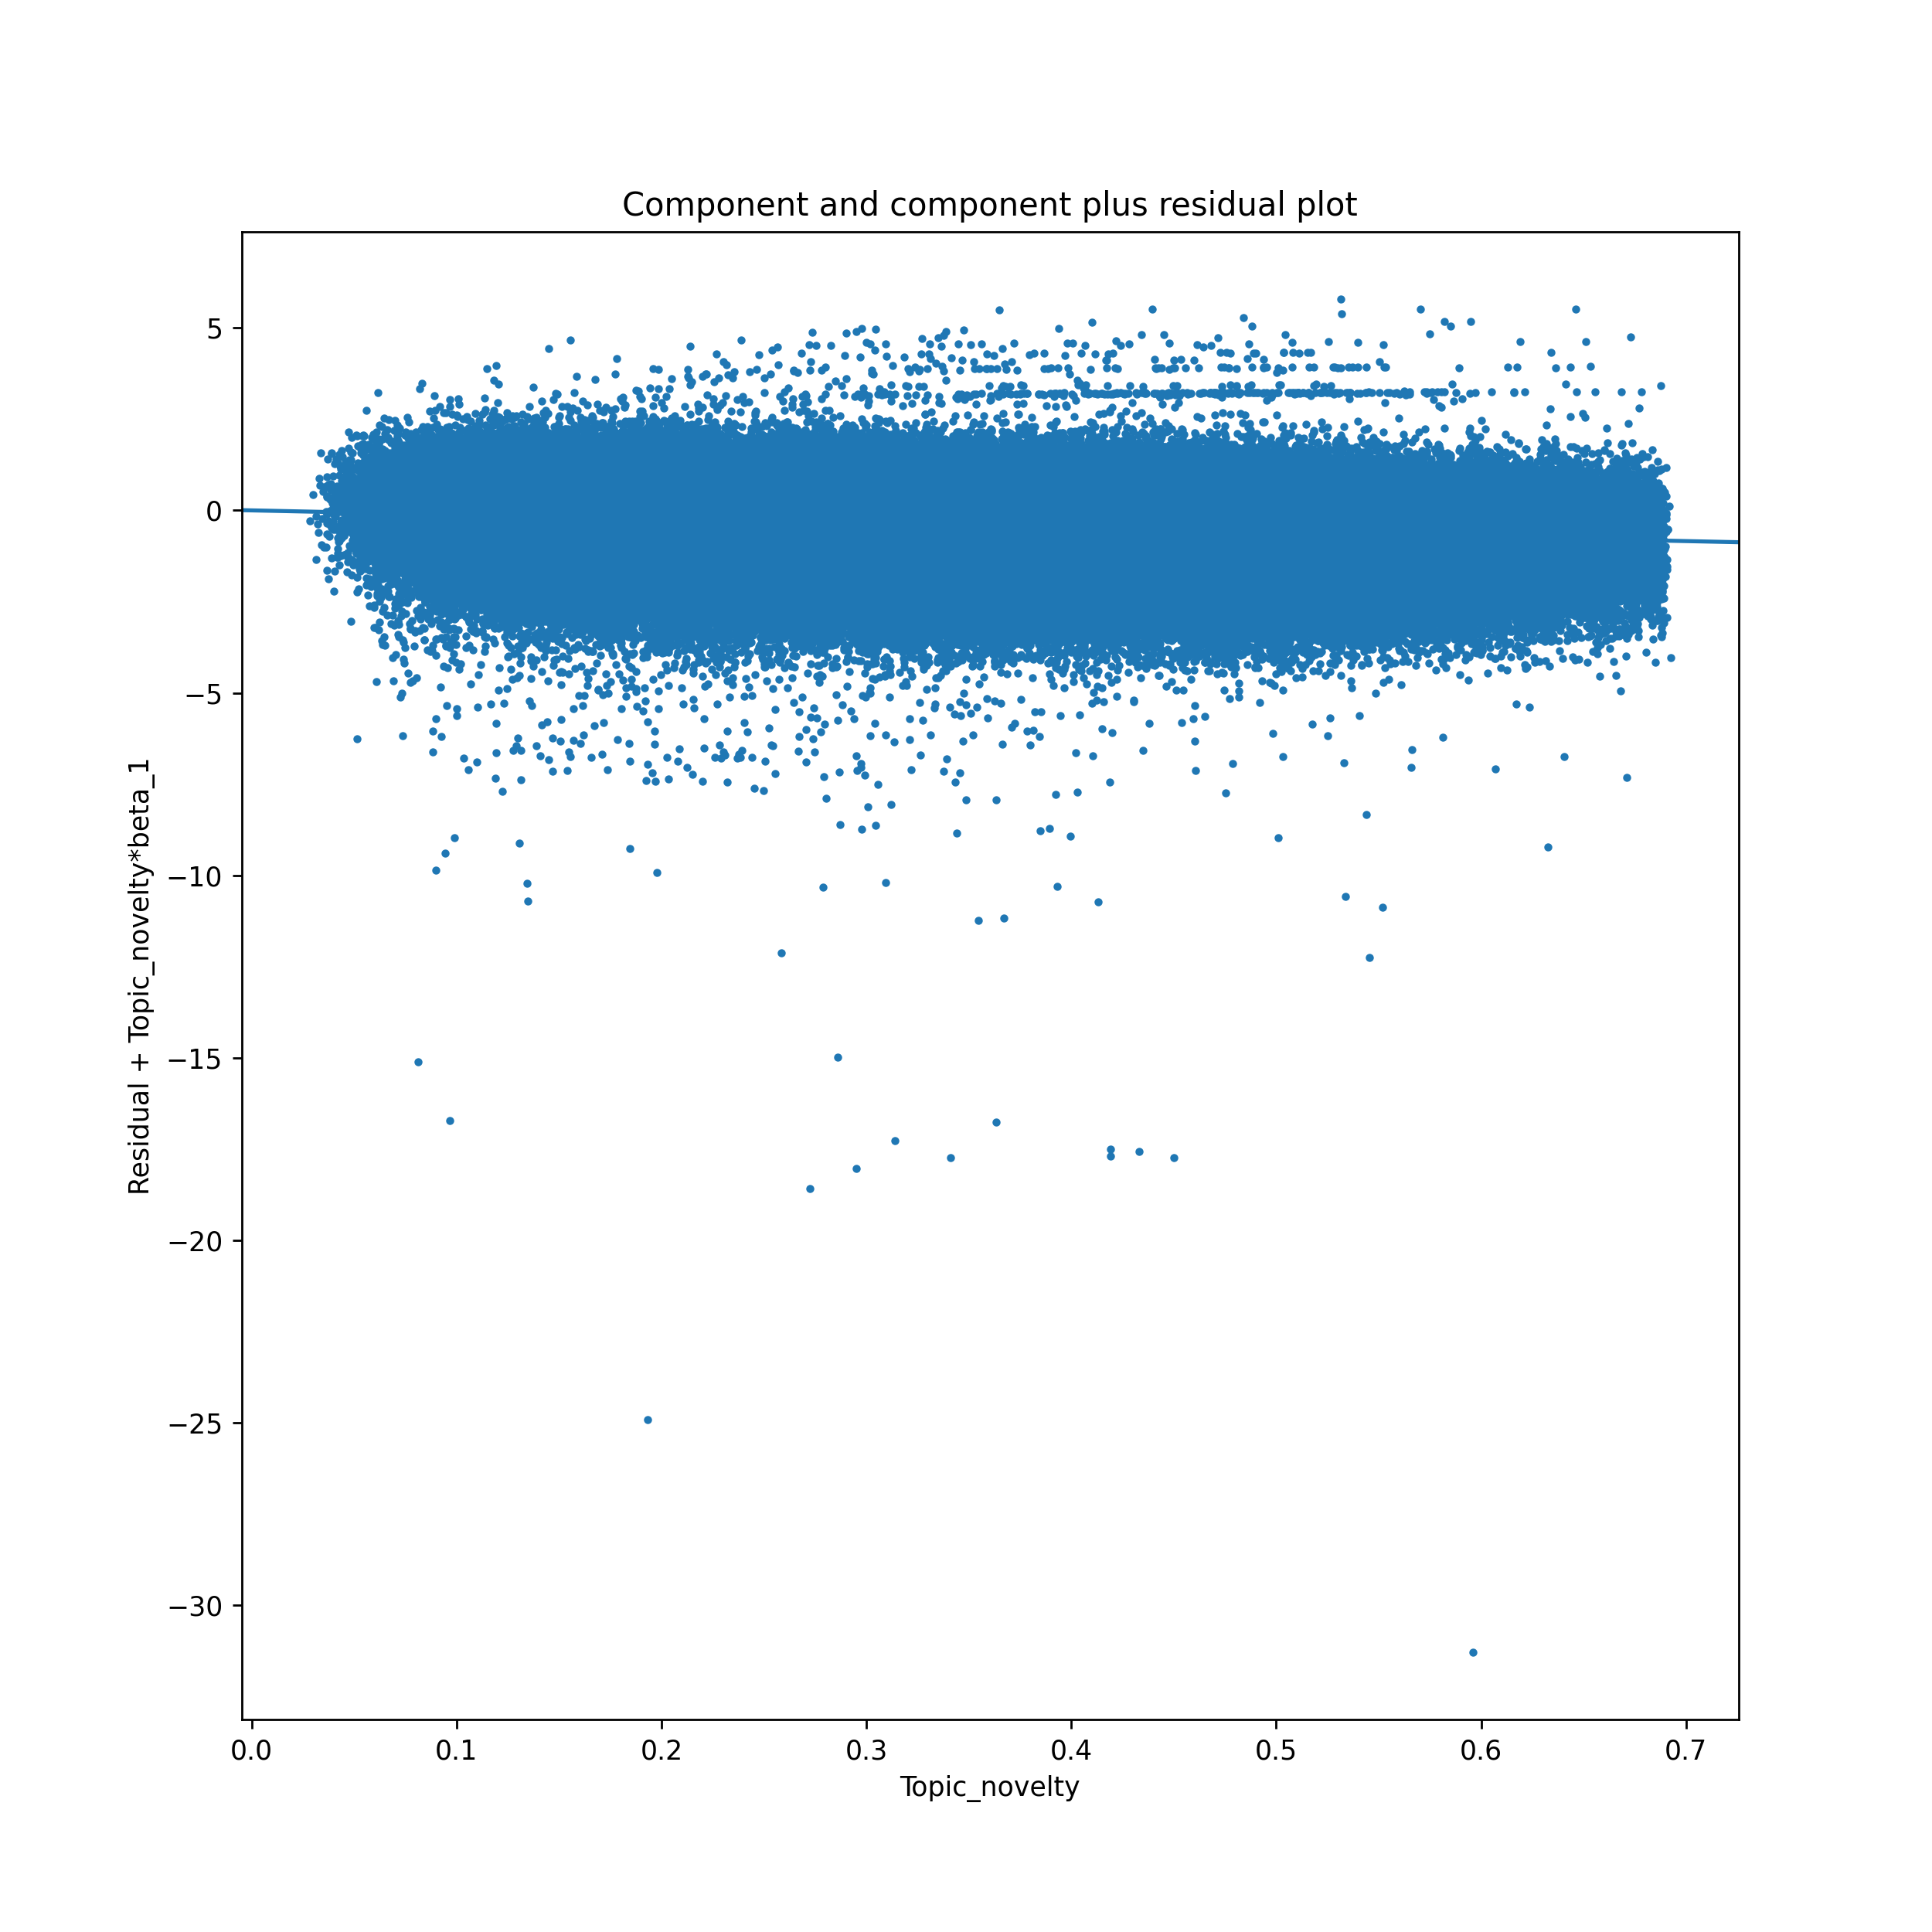

In [218]:
fig, ax = plt.subplots(figsize=(10,10))
sm.graphics.plot_ccpr(kudos_model_sq_False, 'Topic_novelty', ax=ax)
# ax.set_aspect(1)
ax.get_lines()[0].set_markersize(2)